미분 :
분산 : sigma(관측치 - 평균)^2) / n-1
표준편차 : root(sigma(관측치 - 평균)^2) / n-1)
공분산 : sigma(x - x_bar)(y - ybar) / n-1 
상관계수 : (sigma(x - x_bar)(y - ybar) / n-1 ) / (xsigma * ysigma) : -1~1
벡터 거리값 : 각 요소의 차의 제곱을 루트로 구함
model 평가 : MSE (mean square error) -> 연속된 수치인 경우의 평가
             RMSE(root)
신경망에서 cost function 비용함수 : (예측치 - 관측치) => back propagation
                                                        (역전차를 통해서 가중치를 수정)

국어 수학 점수 vector
상관계수가 높다. = 내적이 1이다.
내적을 구하는게 더 쉽기 때문에 내적을 사용

# 회귀분석, 상관분석
- 회귀분석 다중공선성 : 종속변수가 과하게 영향을 받을 수 있음
- 회귀분석 자기상관성(Autocorelation)이 존재 => 시계열 분석
- 시계열 분석 ARMA (Autocoreclation + Moving Average)
  - 이동평균법 ( 주파수를 줄여줌 => 복잡하면 분석 불가 )
  - 정상성을 띈데이터에만 가능
- 비정상 -> 정상성 하여 계산
- ARIMA (Integrated 통합 => 비정상성을 띈데이터에도 가능)
- pandas는 시계열 분석을 지원 ( 시간 index를 지원 )

In [58]:
import numpy as np
from statistics import *
x = np.array([7,8,9])
y = np.array([9,10,20])
print(y.mean()) # 통계 : 중위수(medians) => 이상치의 영향을 받지 않기 때문에
# 공 분산 행렬
print("공분산",np.cov(x))
# 상관계수행렬 (열 2, 행 2 : 4)
print("상관계수",np.corrcoef(x,y))

13.0
공분산 1.0
상관계수 [[1.         0.90419443]
 [0.90419443 1.        ]]


In [5]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본", arr)
print("누적합(행) = ",arr.cumsum(0))
print("누적곱(열) = ",arr.cumprod(1))
print("배열의 합계 = ",arr.sum())
print("열방향으로의 합계(행평균) = ",arr.mean(axis = 1)) # 행방향과 열방향의 구분
print("행방향으로의 합계 = ", arr.sum(0)) # 열별 합계

원본 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합(행) =  [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열) =  [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의 합계 =  45
열방향으로의 합계(행평균) =  [2. 5. 8.]
행방향으로의 합계 =  [12 15 18]


In [7]:
# 가중치(변수 중요도를 부여)를 부여한다는 의미
a = np.array([1,2,3,4])
wts = np.array([4,3,2,1])
print(np.average(a, weights = wts))
std = np.sqrt(np.mean(abs(a-a.mean())**2))
print(np.var([1,2,3,4])) # 분산
print(np.std([1,2,3,4])) # 표준편차

2.0
1.25
1.118033988749895


# matplotlib, seabornm pandas.plot
- matplotlib로 구성
- %matplotlib inline을 사용해야 출력

data1 : mean = 100.776 stdv = 19.620
data2 : mean = 151.050 stdv = 22.358


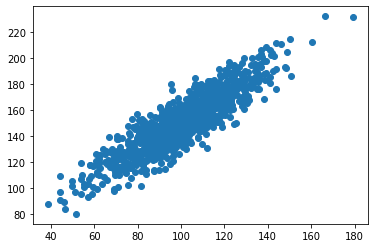

In [60]:
%matplotlib inline
from numpy import mean # 메모리 낭비를 절감
from numpy import std
from numpy.random import randn # 서브 패키지: inalf, random, fft(푸리에 변환), poly(다차방정식)
from numpy.random import seed # random : 의사난수( 데이터 출력순서가 정해져 있다. )
from matplotlib import pyplot
seed(1) # 같은 수가 발생
data1 = 20*randn(1000) + 100 # randn 정규분포(0~1)
data2 = data1 + (10*randn(1000)+50)
print('data1 : mean = %.3f stdv = %.3f' % (mean(data1),std(data1)))
print('data2 : mean = %.3f stdv = %.3f' % (mean(data2),std(data2)))
pyplot.scatter(data1,data2) # 산포도
pyplot.show()

In [62]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


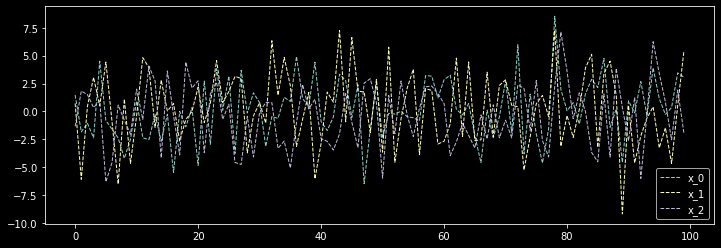

In [63]:
plt.style.use(['dark_background'])
xs = np.random.normal(0,3,(100,3)) # 평균=0, 표준편차:3, 100X3 데이터 생성
plt.figure(figsize=(12,4)) # 모양을 결정
for i in range(0,3):
    x = xs[:,i]
    plt.plot(range(0,len(x)),x,linewidth=1,linestyle='--',label='x_{}'.format(i))
plt.legend() # 범례
# plt.grid(True) # 격자선
plt.grid(False)
plt.show()

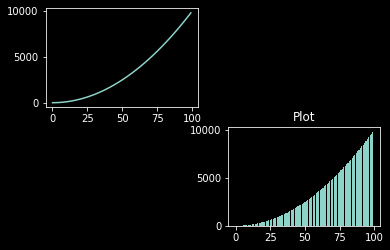

In [64]:
fig = plt.figure()
# ax1 = fig.add_subplot(2,1,1) # 2행 1열 중 첫번째 놈
# ax2 = fig.add_subplot(2,1,2) # 2행 1열 중 2번째 놈

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,4)

x= range(0,100)
y=[v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) # 막대그래프
plt.title("Plot")
plt.show()

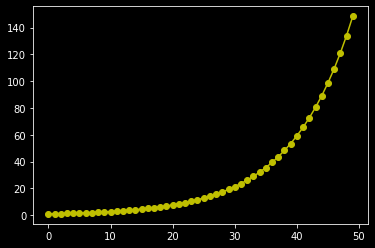

In [65]:
x1 = np.linspace(0.0,5.0)
x2 = np.linspace(0.0,2.0)

plt.plot(np.exp(x1), 'yo-')# 지수함수의 그래프
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


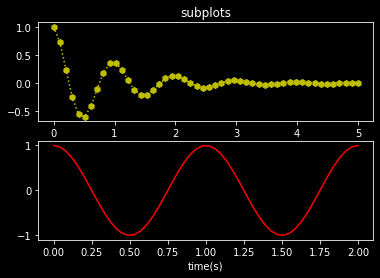

In [66]:
# 
y1 = np.cos(2*np.pi*x1)*np.exp(-x1) # 줄어듬
y2 = np.cos(2*np.pi*x2)
ax1 = plt.subplot(2,1,1)
# plt.plot(x1, y1, 'yo-') # YELLOW, point marking, linetype
plt.plot(x1, y1, 'yh:')
plt.title('subplots')
print(ax1)
ax2 = plt.subplot(2,1,2)
plt.plot(x2,y2,'r-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

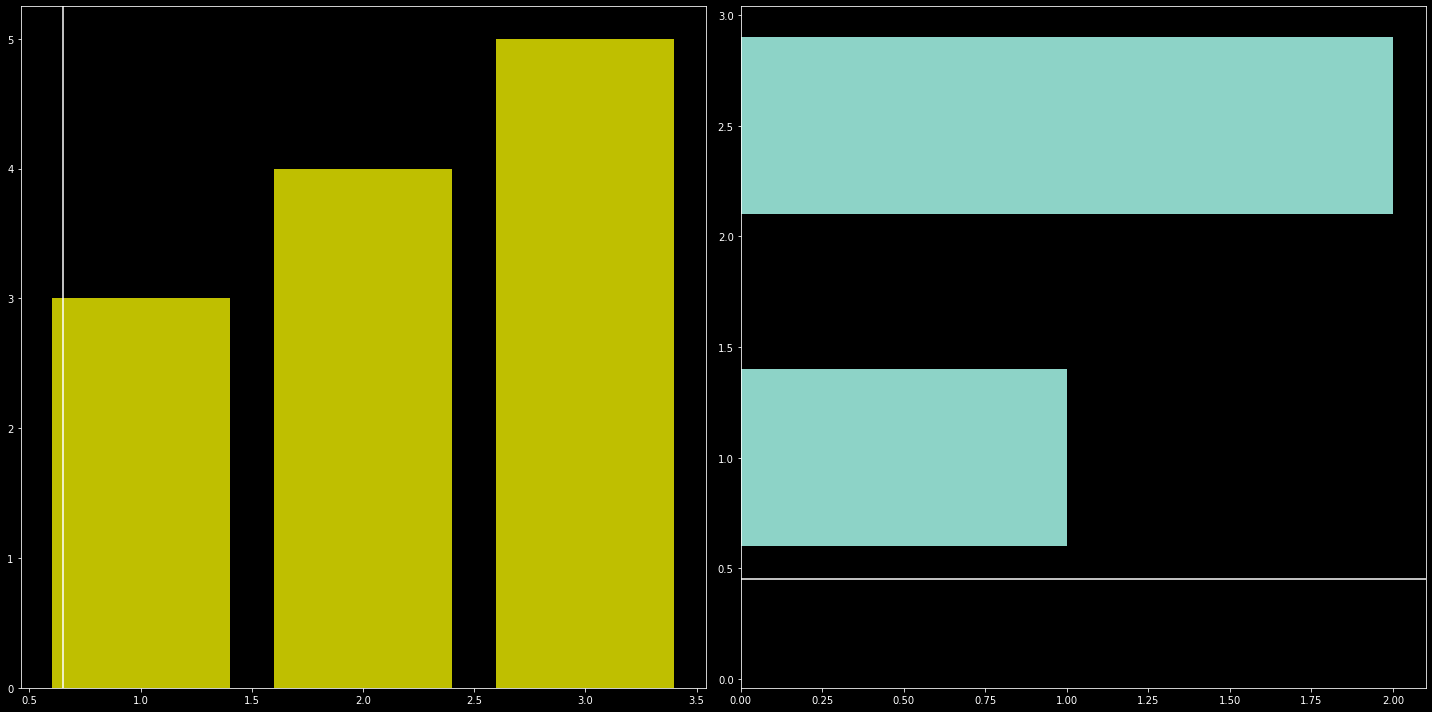

In [67]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 이산형 막대그래프:bar , 연속형그래프: histogram
ax1.bar([1,2,3],[3,4,5],color='y')
ax2.barh([0.5,1,2.5],[0,1,2]) # v :vertical 수직으로, h : horizontal 수평으로
ax1.axvline(0.65)
ax2.axhline(0.45)
plt.tight_layout() # 여백을 줄여서 표현
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2911ea0c548>,
 'caps': [<matplotlib.lines.Line2D at 0x2911ea0ce88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2911ea03d08>],
 'medians': [<matplotlib.lines.Line2D at 0x2911ea11e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2911ea17c88>],
 'means': []}

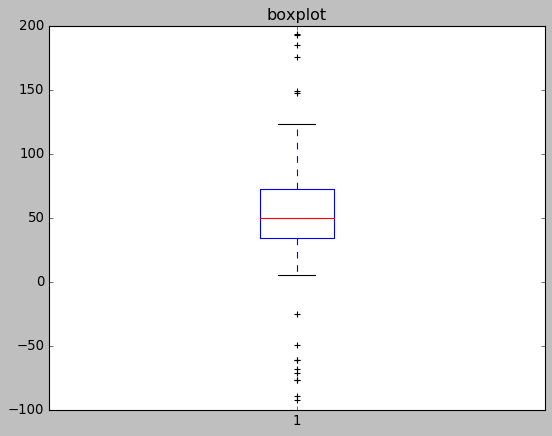

In [68]:
# boxplot
# IQR(Inter quantile range = 3 사분위수 - 1사분위수)
# IQR * (+-)1.5 : 상하한선
plt.style.use(['classic'])
np.random.seed(19680801)
spread = np.random.rand(50) * 100 # 분포
center = np.ones(25) * 50 # 중심
flier_high = np.random.rand(10)*100+100 # 상한선을 넘는 데이터
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig1, ax1 = plt.subplots() # 형태를 제어, 도화지
ax1.set_title('boxplot')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x2911ea78808>,
 'caps': [<matplotlib.lines.Line2D at 0x2911ea78f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2911ea72cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2911ea7bf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2911ea81f48>],
 'means': []}

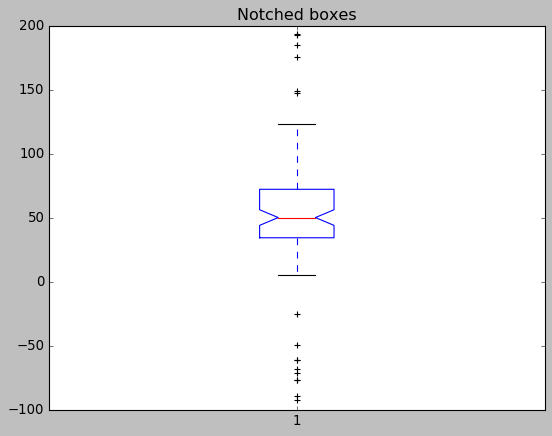

In [69]:
fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes') # 홈의 95% 신뢰구간
ax2.boxplot(data, notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2911eae2f08>,
 'caps': [<matplotlib.lines.Line2D at 0x2911eae5a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2911eae2548>],
 'medians': [<matplotlib.lines.Line2D at 0x2911eaeabc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2911eaedb88>],
 'means': []}

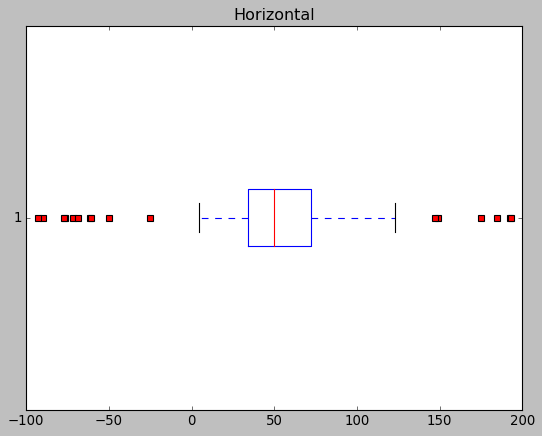

In [70]:
# vertical 수직의, horizontal 수평의
red_square = dict(markerfacecolor='r',marker='s') # square
fig5, ax5 =plt.subplots()
ax5.set_title('Horizontal')
ax5.boxplot(data, vert=False, flierprops=red_square) # 이상치표현을 제어

# CNN(Convolution Neual Network)

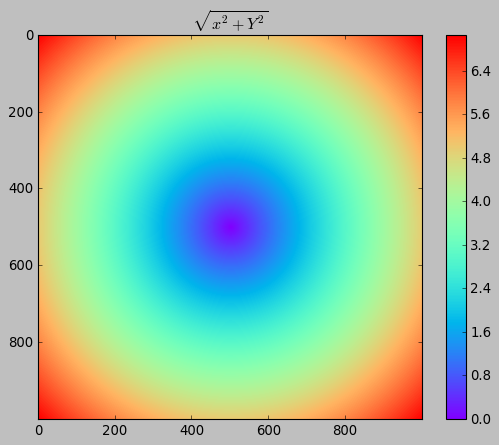

In [54]:
# meshgrid 그물망 격자
# 그래프에 수식 : latex 문법
points = np.arange(-5,5,0.01) # 1000
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)

# 팔레트 : 
plt.imshow(z, cmap=plt.cm.rainbow); # 데이터를 이미지로 출력
plt.colorbar() # 컬러별 수의 크기값을 출력
plt.title("$\sqrt{x^2+Y^2}$")
plt.show()

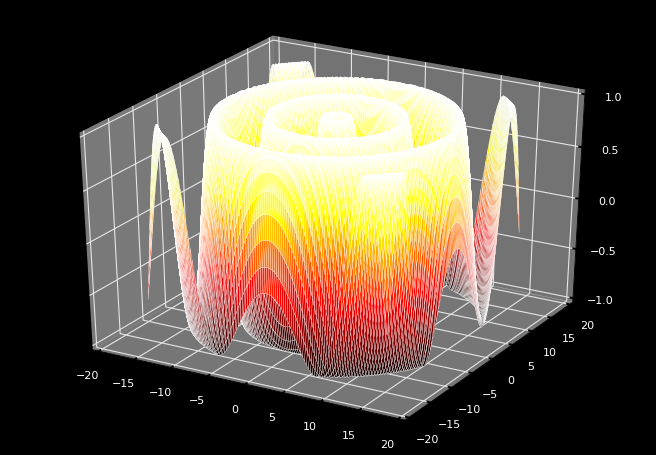

In [65]:
# 3차원 : Axes3D
plt.style.use(['seaborn-notebook'])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig) # 3차원 출력 도화지
X = np.arange(-4,4,0.25) # 0,0
Y = np.arange(-4,4,0.25)
X, Y = np.meshgrid(X,Y) # 좌표점 -4, -3.75, -3.5
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) # sin은 주기성을 띄기 때문에 증가 감소가 반복된다. # arange속 숫자를 바꿔주면 확인 가능
# Z = R
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='hot')
plt.show()
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.rainbow)
plt.show()

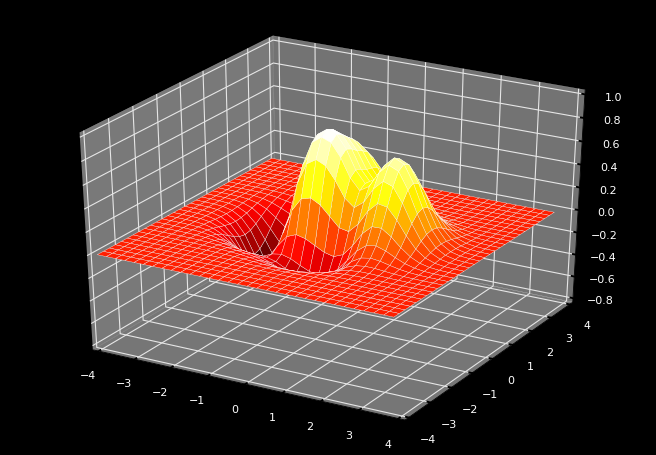

In [67]:
from mpl_toolkits.mplot3d import Axes3D
# 방정식
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)
Z = np.sin(f(X,Y))
# row,column
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='hot')
plt.show()

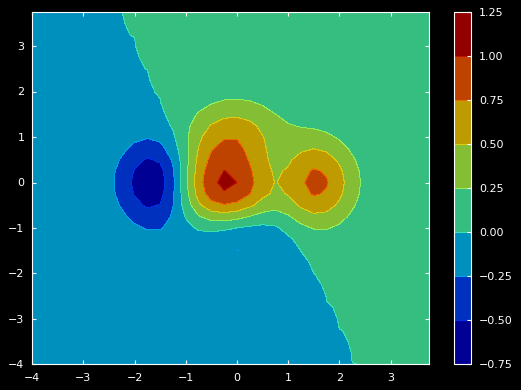

In [69]:
plt.contourf(X,Y,f(X,Y),8,alpha=.75,cmap='jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


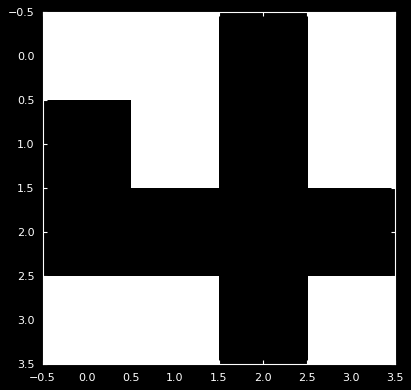

In [70]:
a = [0,0,1,0,
    1,0,1,0,
    1,1,1,1,
    0,0,1,0]
np1 = np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4),cmap='Greys',interpolation='nearest') 
# 보간법 " 컬러값이 저정이 되지 않으면 보간해서 적용하라."
plt.show()

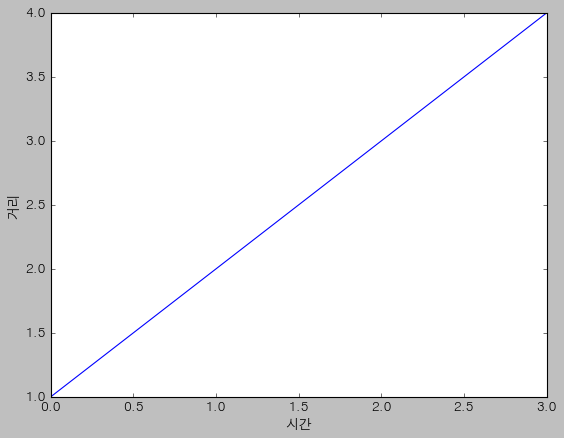

In [85]:
%matplotlib inline
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path = "C:\\Windows\\Fonts\\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.plot([1,2,3,4])
plt.xlabel("시간")
plt.ylabel("거리")
plt.show()

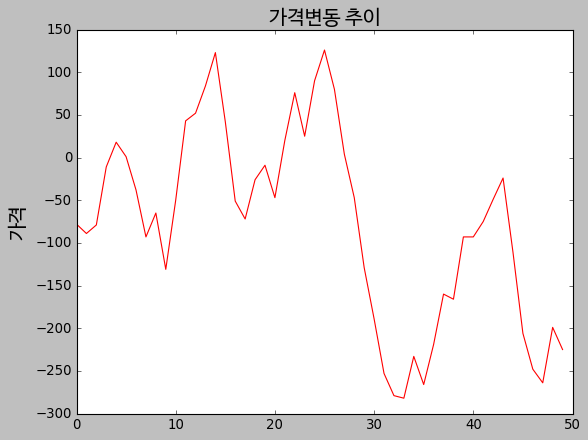

In [79]:
import matplotlib.font_manager as fm

path = 'c:\\windows\\Fonts\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
data = np.random.randint(-100,100,50).cumsum()
data
plt.plot(range(50),data,'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격',fontproperties=fontprop)
plt.show()

Text(0, 0.5, 'f(x)')

findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.
findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.


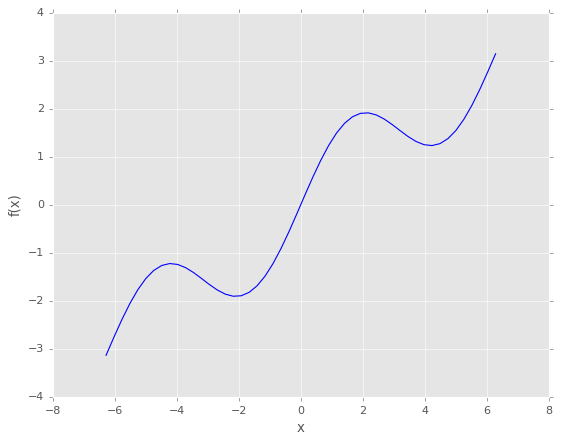

In [81]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = '바탕'
def f(x):
    return np.sin(x) + 0.5*x # 주기함수
x = np.linspace(-2*np.pi,2*np.pi,50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 최소제곱법을 이용해서 fitting 적합

Text(0, 0.5, 'f(x)')

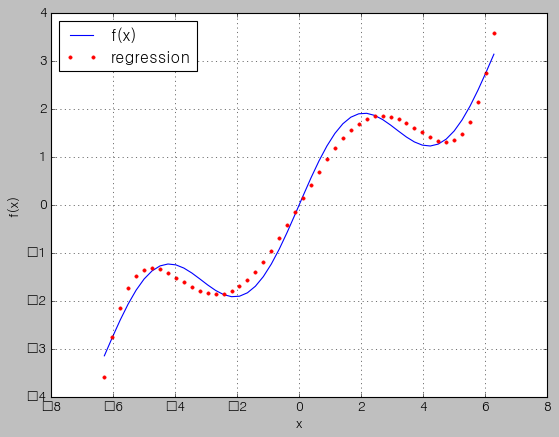

In [88]:
# polyfit 다차방정식으로 fitting (적합) : 계수를 찾아내는 것 
reg = np.polyfit(x,f(x),deg=5) # 5차방정식으로 피팅하라.
ry = np.polyval(reg,x)

plt.plot(x,f(x),'b',label='f(x)') # 원본데이터
plt.plot(x,ry,'r.',label='regression') # 최소제곱법으로 fitting된 데이터
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [1]:
# 지리정보시스템
import folium
# 위경도좌표
map_1 = folium.Map(location=[37.565711,126.978090],zoom_start=16) # 확대축소
#                    ,tiles='Stamen Terrain')
folium.Marker([37.565711,126.9978090], popup='서울시청').add_to(map_1)
folium.Marker([37.565711,126.978190],popup='서울시청및',
              icon=folium.Icon(icon='cloud')).add_to(map_1)

map_1

# 숙제 : 서울 소재 10개 대학의 좌표를 출력해보시오.

In [2]:
# 지리정보시스템
import folium
# 위경도좌표
map_2 = folium.Map(location=[37.530627,126.945584],zoom_start=12, tiles='Stamen Terrain')

In [3]:
folium.Marker([37.460163,126.951959],popup='서울대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.505369,126.957112],popup='중앙대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.561927,126.945584],popup='이화여자대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.584146,127.058756],popup='서울시립대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.588482,126.993585],popup='성균관대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.591548,127.022174],popup='성신여자대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.566082,126.938561],popup='연세대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.597284,127.027788],popup='고려대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.597346,127.058893],popup='외국어대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
folium.Marker([37.557487,127.045268],popup='한양대학교', icon=folium.Icon(icon='cloud')).add_to(map_2)
map_2

In [ ]:
# pandas: Series, DataFrame, Panel
# numpy 방식의 인덱싱이 가능, + dict(중복을 허용, 순서를 보장)

In [93]:
import pandas as pd
data = {'a': 0., 'b': 1., 'c': 2.} # dict
s= pd.Series(data) # 1 차원, 키가 인덱스로 변함
print(s['a']) # 키이 인덱싱
s= pd.Series(data, index=['b','c','d','a']) # 행이름
print(s['a'])
print(s['d']) # data가 없을땐 nan
list(s)

0.0
0.0
nan


[1.0, 2.0, nan, 0.0]

In [96]:
s =pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print("인덱스에 의한 출력",s[0]) # 순서에 의한 인덱스
print(s['a']) # 키이에 의한 인덱스
print(s[:3]) # numpy
print("음수",s[-3:])
s['a']=100
print(s['a'])
s['f']=10
print(s['f'])
print("filtering에 의한 출력", s[s>4]) # 인덱스 : boolean index
print(s)
print(s*2)

인덱스에 의한 출력 1
1
a    1
b    2
c    3
dtype: int64
음수 c    3
d    4
e    5
dtype: int64
100
10
filtering에 의한 출력 a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [105]:
data = np.array(['a','b','c','d']) # ndarray
# range => list
# arange => ndarray
# RangeIndex 객체가 자동으로 생성됨 => Index
s = pd.Series(data) # ndarray를 이용해 시리즈 초기화
print('시리즈 데이터', s.values) # 값만
print('시리즈 인덱스', s.index) # RangeIndex(start=0,stop =4,step=1)
print('시리즈 초기화', s)
print('시리즈 인덱스의 값',s.index.values)
print(s[0])
print(s.head()) # tail()
print(s.value_counts()) # 도수 분포표
print(s.value_counts(normalize=True)) # 사이즈 1로 => 상대도수분포표
print(s.describe()) # 숫자변수에 대해서만 출력, 문자열 => object
print('데이터 타입은 : ', s.dtypes)
print('차원',s.ndim)
print('차수', s.shape)

시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈 초기화 0    a
1    b
2    c
3    d
dtype: object
시리즈 인덱스의 값 [0 1 2 3]
a
0    a
1    b
2    c
3    d
dtype: object
c    1
a    1
d    1
b    1
dtype: int64
c    0.25
a    0.25
d    0.25
b    0.25
dtype: float64
count     4
unique    4
top       c
freq      1
dtype: object
데이터 타입은 :  object
차원 1
차수 (4,)


In [106]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon': 16000, 'Utah':5000}
obj3 = pd.Series(sdata)
print(obj3)
print(obj3.shape)
states = ['California','Ohio','Oregon','Texas']
obj4 = pd.Series(sdata,index=states) # California: NaN
print(obj4)
print("시리즈 인덱스", obj3.index) # Index
print("시리즈 인덱스", obj4.index) # Index
print("null이 있는가 ", pd.isnull(obj4)) # 데이터가 널인가
print("결측치가 있는가 ",pd.notnull(obj4)) # 널이 아닐때 True
print("객체 출력")
print("obj3을 출력합니다. ",obj3)
print("obj4를 출력합니다. ",obj4 )
# 짝이 맞지 않기 때문에 : Index 가 다름
#                         -> 짝이 없으면 NaN (pandasd의 특징)
print("연산결과를 출력합니다. ", obj3+obj4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
시리즈 인덱스 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈 인덱스 Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object')
null이 있는가  California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
결측치가 있는가  California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
객체 출력
obj3을 출력합니다.  Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
obj4를 출력합니다.  California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
연산결과를 출력합니다.  California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [107]:
s = pd.Series(['A','B','Aaba','Baca',np.nan,'CABA','cat'])
s.str.count('a')

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


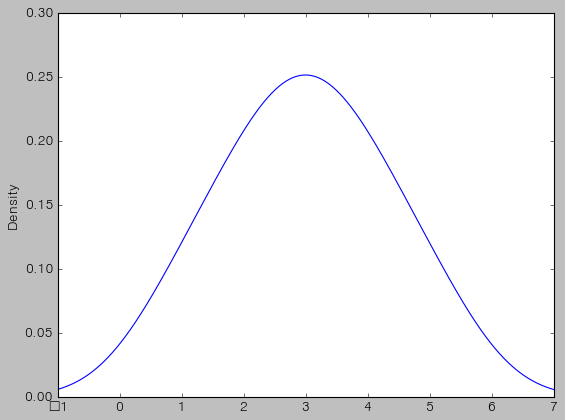

In [108]:
s = pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() # kernel density estimate]
# 데이터가 없는 부분은 kernel로 예측 (kernel : 가우시안 분포)
plt.show()

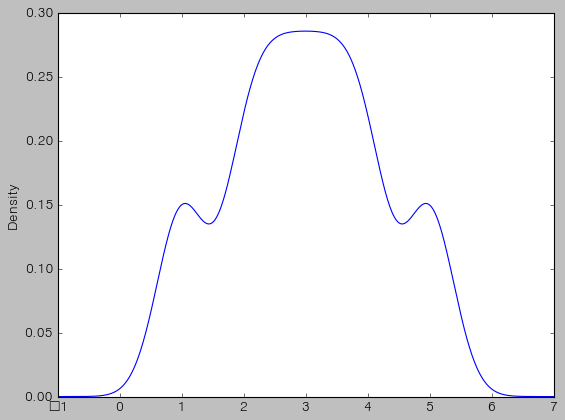

In [109]:
s.plot.kde(bw_method=0.3) # 과적합 bin width
plt.show()

In [111]:
import pandas as pd
# 행인덱스와 열인덱스
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [112]:
# 객체비교 is None
data.area is data['area']

True

In [113]:
# 객체에서 변수를 실시간 추가하는 것이 가능
# append
data['density'] = data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [114]:
data.values # ndarray => numpy함수로 처리

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [115]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [116]:
data.values[0] # 행값

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [117]:
data.iloc[:3,:2] : 행과열로 입력

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [119]:
data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [120]:
data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [123]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [124]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [125]:
df = pd.DataFrame(d)
print(df)
print('축',df.axes)
print('데이터 타입',df.dtypes)
print('데이터 타입',df.get_dtype_counts) # unique한 데이터만 출력 (중복이 없음)
print('비었나',df.empty) # 데이터가 비었나?
print('차원',df.ndim)
print('차수',df.shape)
print('사이즈',df.size)
print('값',df.values)
print(df.head(2))
print(df.tail(2))

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
데이터 타입 Name       object
Age       float64
Rating    float64
dtype: object
데이터 타입 <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>
비었나 False
차원 2
차수 (8, 3)
사이즈 24
값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [129]:
print('합계',df.sum()) # 전체 데이터합
print(df.mean()) # 숫자만 적용
print(df.std()) # standard devialtion 표준편차
print(df.describe()) # 숫자데이터만 적용
print('오브젝트', df.describe(include=['object'])) # 문자데이터도 적용
print(df. describe(include='all')) # unique, top, freq

합계 Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object
Age       25.857143
Rating     3.658571
dtype: float64
Age       2.734262
Rating    0.698628
dtype: float64
             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000
오브젝트        Name
count     8
unique    8
top     이하나
freq      1
       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     이하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


# 문제

In [27]:
import pandas as pd
data={'state': ['경기', '강원', '서울', '충북', '인천'],
      'year':[2000,2001,2002,2001,2002],
      'pop':[1.5,1.7,3.6,2.4,2.9]}
frame2=pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                 index=['one', 'two', 'three', 'four', 'five']) 

In [33]:
# 1) state만 출력하시오.
print(frame2['state'])
print(frame2.state)

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object
one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object


In [35]:
# 2) debt 열을 추가 하고 모든 값을 16.5로 입력하시오.
frame2['debt'] = 16.5
print(frame2)

       year state  pop  debt
one    2000    경기  1.5  16.5
two    2001    강원  1.7  16.5
three  2002    서울  3.6  16.5
four   2001    충북  2.4  16.5
five   2002    인천  2.9  16.5


In [36]:
# 3) debt를 pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])로 수정하시오.
val = pd.Series([-1.2,-1.5,-1.7], index=['two','four','five'])
frame2['debt'] = val
print('시리즈 데이터 삽입후',frame2)

시리즈 데이터 삽입후        year state  pop  debt
one    2000    경기  1.5   NaN
two    2001    강원  1.7  -1.2
three  2002    서울  3.6   NaN
four   2001    충북  2.4  -1.5
five   2002    인천  2.9  -1.7


In [40]:
# 4) 파생변수 'estern'에 주소가 서울인가를 따져 서울은 True 아니면 False가 입력되게 하시오.
frame2['estern']=frame2.state == '서울'
print(frame2.columns)
del frame2['estern']
print(frame2["year"]["one"]) # 열이 먼저옴
print(frame2.loc["one","year"])

Index(['year', 'state', 'pop', 'debt', 'estern'], dtype='object')
2000
2000


In [ ]:
# 시간 함수
# 리눅스 : timestamp 1970.1.1 이후로 경과된 mili초로 표현
# 내부적으로 데이터 저장시 timestamp
# pandas 에서는 nano 초까지 표현
#              시간인덱스 : 시계열분석 : DataTimeIndex, Periopdindex 주기값
# 파이썬: time.time() : 2000.1.1부터 경과된 mili 초로 표현
# datatime (날짜와 시간을 표현)

In [41]:
import time
print(time.time()) # (시분초.밀리초)로 표현
print(time.localtime()) # 연월일 시분초로 변경
yesterday = time.localtime(time.time()-60*60*24) # 시간연산 가능
yesterday
print(yesterday)
time.strftime('%Y %m %d') # 시간을 문자열로 변경해서 출력

1578383525.3145547
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=16, tm_min=52, tm_sec=5, tm_wday=1, tm_yday=7, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=16, tm_min=52, tm_sec=5, tm_wday=0, tm_yday=6, tm_isdst=0)


'2020 01 07'

In [42]:
from datetime import date, time, datetime, timedelta # 시간차
now = datetime.now() # 년월일 시분초
print(now)
now.year, now.month, now.day
now.timestamp() # 시간을 밀리초로 표현하고 싶을 때

2020-01-07 16:55:23.743979


1578383723.743979

In [47]:
now_str=now.strftime('%Y-%m-%d %H:%M:%S') # 년월일시분초=>문자열
now_str

2020-01-07 16:55:23


In [44]:
datetime.strptime(now_str, '%Y-%m-%d %H:%M:%S')
# 날짜형식으로 변환

datetime.datetime(2020, 1, 7, 16, 55, 23)

In [48]:
delta = datetime(2015, 1, 7) - datetime(2010,6,24,8,15)
print('시간차는= ',delta,delta.days,delta.seconds)

시간차는=  1657 days, 15:45:00 1657 56700


In [49]:
start = datetime(2019,1,7)
print(start + timedelta(12)) # 기본이 날짜
start + timedelta(hours=-5)

2019-01-19 00:00:00


datetime.datetime(2019, 1, 6, 19, 0)

In [50]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687255,unit='s'))

2020-01-07 17:07:15.464381
2017-03-01 00:00:00
2020-04-24 00:14:15


In [51]:
# DatetimeIndex 생성 : 행 : Index, 열키 : columns
# 30분 단위로 
print(pd.date_range("11:00","13:30",freq="30min"))
print("시간으로",pd.date_range("11:00","13:30",freq="30min").time)
print(pd.date_range("11:00","13:30",freq="H")) # hour

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00', '2020-01-07 13:30:00'],
              dtype='datetime64[ns]', freq='30T')
시간으로 [datetime.time(11, 0) datetime.time(11, 30) datetime.time(12, 0)
 datetime.time(12, 30) datetime.time(13, 0) datetime.time(13, 30)]
DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 12:00:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='H')


In [54]:
# 지정된 시간을 DatetimeIndex
print(pd.to_datetime(pd.Series(['Jul 31. 2009','2010-01-10',None])))
print(pd.to_datetime(['2005/11/23','2010.12.31',None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]
DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)


In [55]:
print(pd.date_range('1/1/2017',periods=5)) # 일간격 : 기본주기는 날짜

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')


In [56]:
print(pd.date_range('1/1/2017',periods=5,freq='M')) 

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


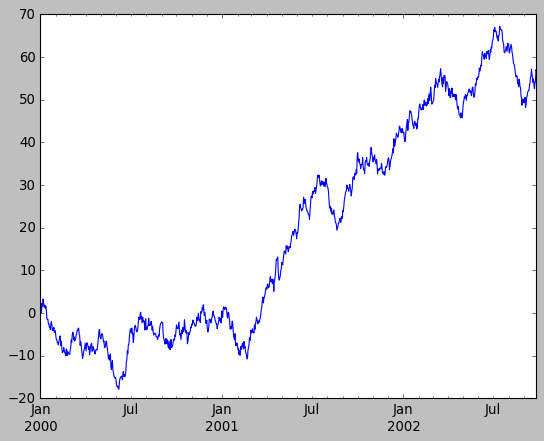

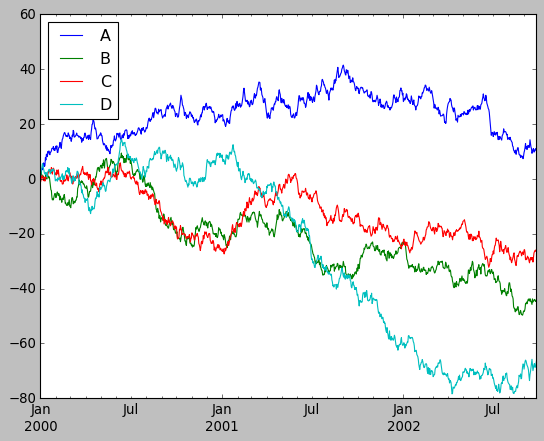

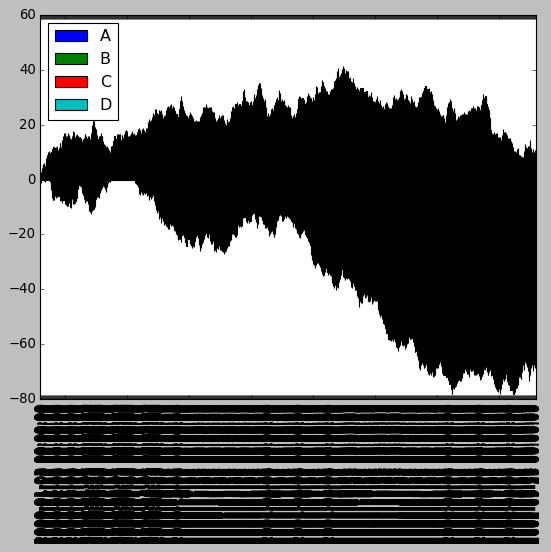

In [71]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD'))
df = df.cumsum()
df.plot()
df.plot.bar()

In [ ]:
# 문제 다음 데이터를 데이터프레임에 저장하시요
#         지역  2018     2017 2016 2015 2015-2018 증가율
# 서울 수도권  9904312 9631482 9762546 9853972    0.0283
# 부산 경상권  3448737 3393191 3512547 3655437    0.0163
# 인천 수도권  2890451 2632035 2517680 2466338    0.0982
# 대구 경상권  2466052 2431774 2456016 2473990    0.0141 

In [72]:
columns = ["지역","2015","2010","2005","2000","2010-2015 증가율"]
index = ["서울","부산","인천","대구"]

1) 문제 : "2010-2015 증가율"을 %로 변경하시오
2) 문제 : 2015-2017의 증가율을 구해서 변수를 추가하시오.
         열이름:"2015-2017 증가율"

In [97]:
import pandas as pd
data={'지역': ["수도권","경상권","수도권","경상권"],
      '2018': [9904312,3448737,2890451,2466052],
      '2017': [9631482,3393191,2632035,2431774],
      '2016': [9762546,3512547,2517680,2456016],
      '2015': [9853972,3655437,2466338,2473990],
      '2017-2018 증가율' : [0.0283,0.0163,0.0982,0.0141]}
frame3=pd.DataFrame(data, columns=["지역","2018","2017","2016","2015","2017-2018 증가율"],
                 index=["서울","부산","인천","대구"]) 

In [98]:
frame3

,지역,2018,2017,2016,2015,2017-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [99]:
# 문제1
frame3['2017-2018 증가율'] = frame3['2017-2018 증가율']*100
frame3

,지역,2018,2017,2016,2015,2017-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [100]:
# 문제2
frame3['2015-2017 증가율'] = ((frame3['2017']-frame3['2015'])/frame3['2015'])*100
frame3

,지역,2018,2017,2016,2015,2017-2018 증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-2.257871
부산,경상권,3448737,3393191,3512547,3655437,1.63,-7.174135
인천,수도권,2890451,2632035,2517680,2466338,9.82,6.718341
대구,경상권,2466052,2431774,2456016,2473990,1.41,-1.706393
